✅ Confusion Matrix
[[608  43]
 [ 67 282]]

✅ Classification Report
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       651
           1       0.87      0.81      0.84       349

    accuracy                           0.89      1000
   macro avg       0.88      0.87      0.88      1000
weighted avg       0.89      0.89      0.89      1000

Accuracy: 0.89

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92       651
           1       0.87      0.81      0.84       349

    accuracy                           0.89      1000
   macro avg       0.88      0.87      0.88      1000
weighted avg       0.89      0.89      0.89      1000


Confusion Matrix:
 [[608  43]
 [ 67 282]]


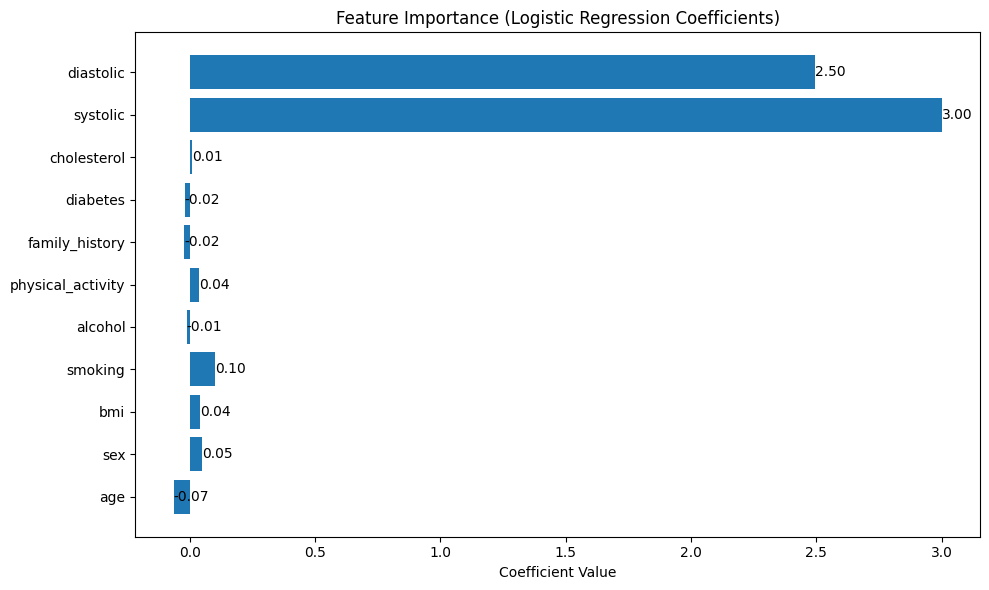

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
df = pd.read_csv("hypertension_dataset_extended.csv")
df.head()
df_encoded = df.copy()
df_encoded["sex"] = df_encoded["sex"].map({"Male": 0, "Female": 1})
X = df_encoded.drop("hypertension", axis=1)
y = df_encoded["hypertension"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print("✅ Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

print("\n✅ Classification Report")
print(classification_report(y_test, y_pred))
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 예측
y_pred = model.predict(X_test_scaled)

# 평가 결과 출력
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
import numpy as np
import matplotlib.pyplot as plt

# 특성 이름
feature_names = X.columns

# 모델 계수
coef = model.coef_[0]

# 중요도 시각화
plt.figure(figsize=(10, 6))
bars = plt.barh(feature_names, coef)
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.xlabel("Coefficient Value")

# 값 표시
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.2f}', va='center')

plt.tight_layout()
plt.show()
X = df.drop(columns=["hypertension", "systolic", "diastolic"])
y = df["hypertension"]

